In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
data = pd.read_csv('../data/data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display summary statistics to get an overview of numerical features
print(data.describe())

# Check for missing values in each column
print('Missing Values:', data.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000  \
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    

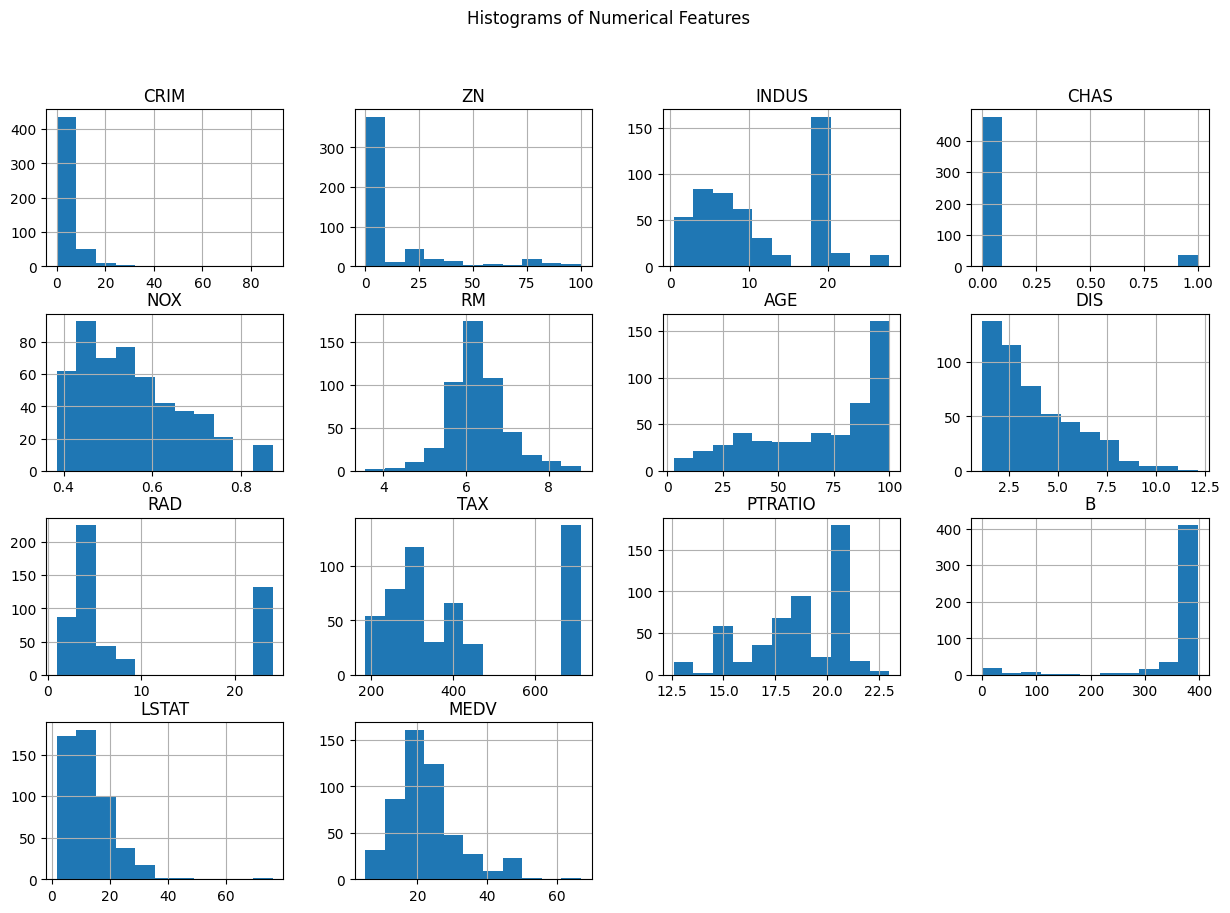

In [2]:
# Histograms for numerical data to understand distributions
data.hist(bins=11, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

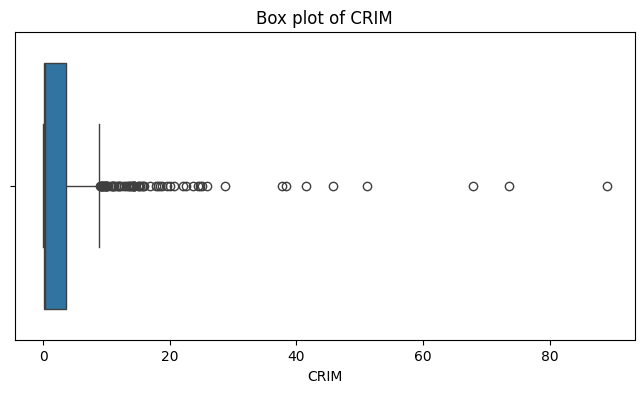

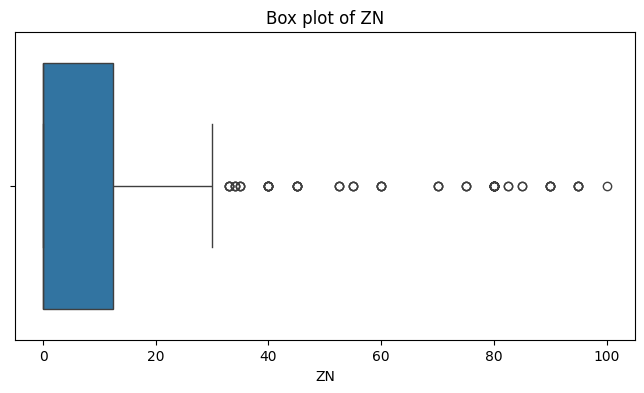

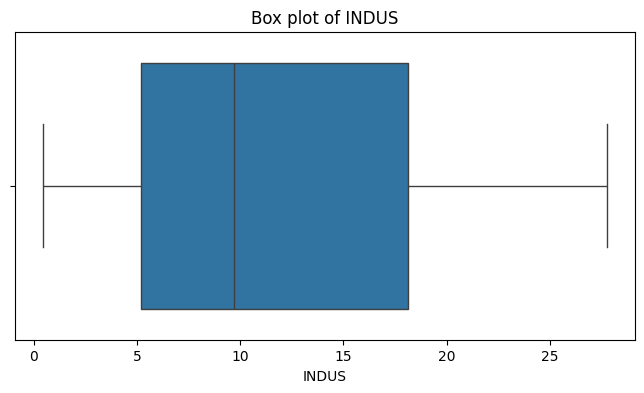

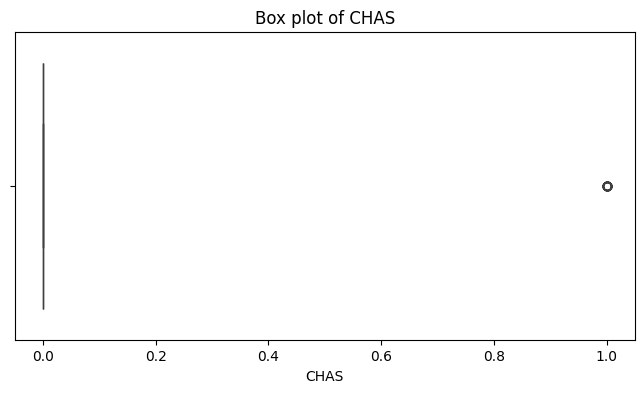

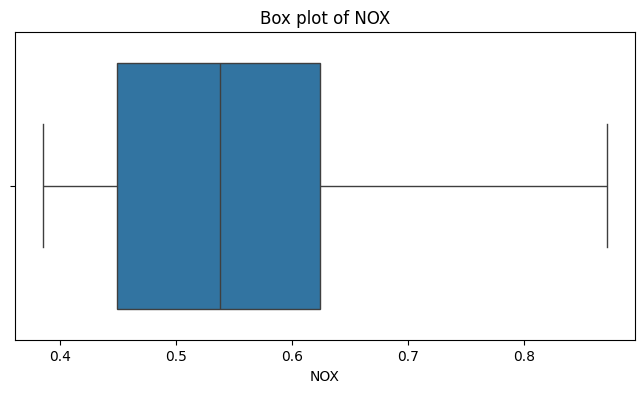

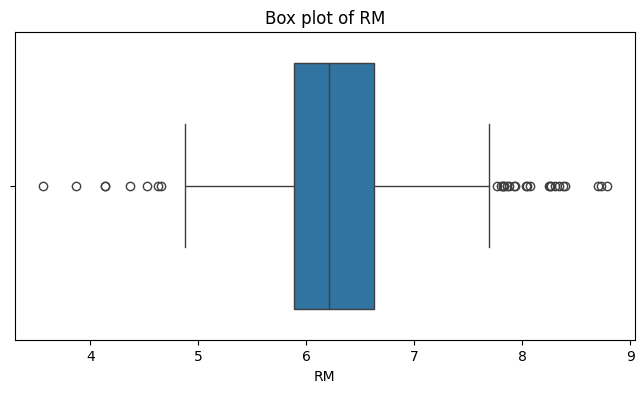

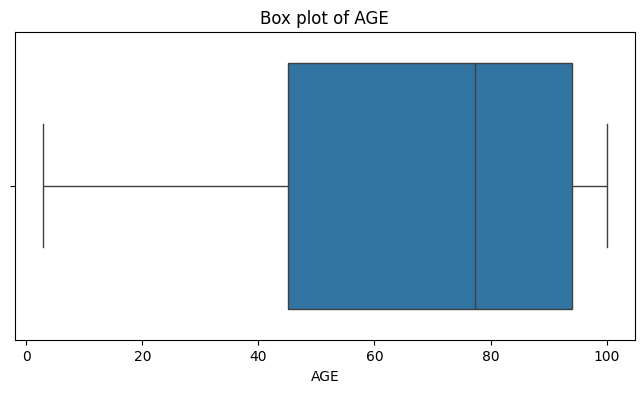

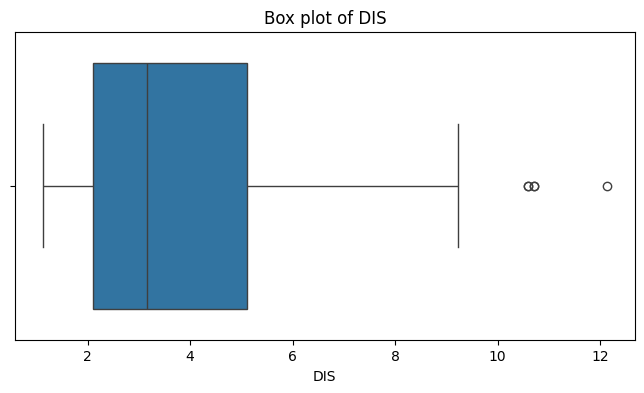

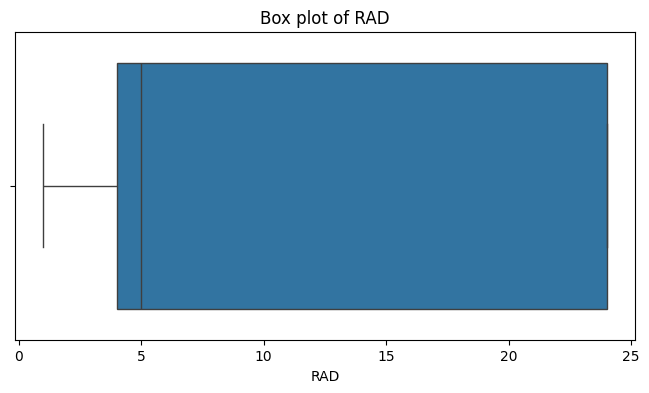

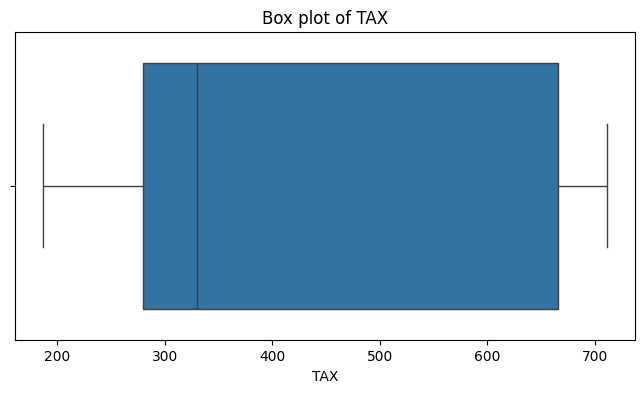

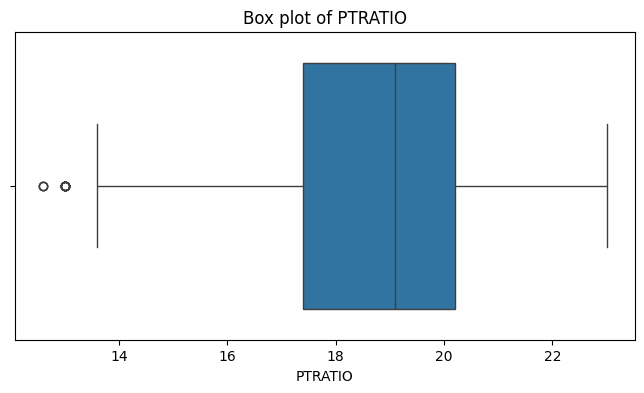

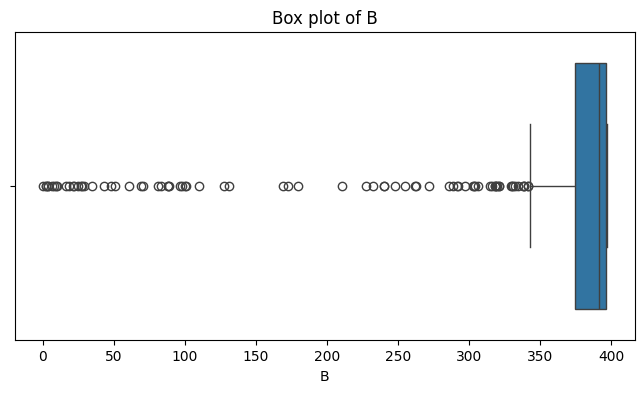

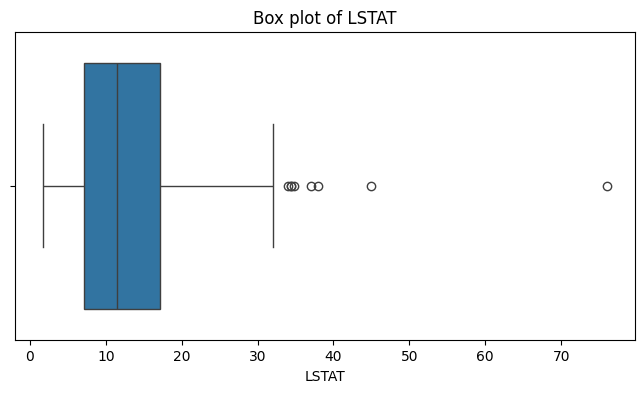

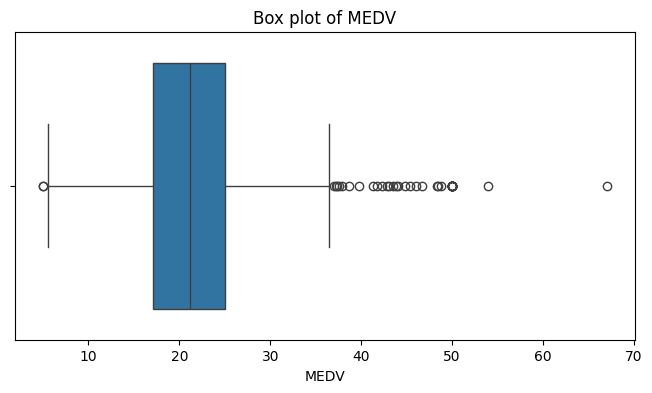

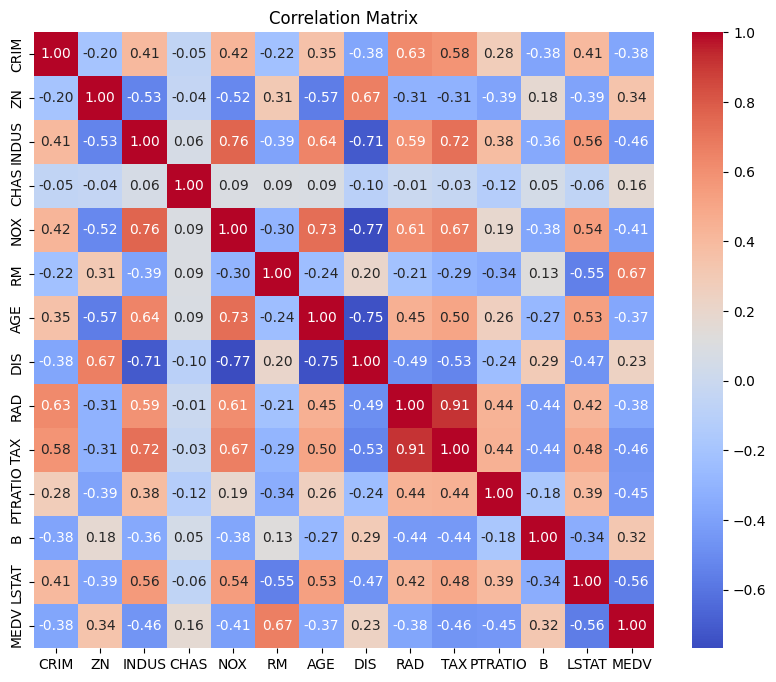

In [3]:
# Box plots to visualize outliers and overall spread of the data
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Correlation matrix heatmap to understand the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Check for missing values in each column
print('Missing Values: \n', data.isnull().sum())

# Print the number of rows in the dataset
print('Number of Rows: ', len(data))

# The percentage of missing values with respect to the entire dataset
print(f'Percentage of Missing Values: {data.isnull().sum().sum()/len(data)*100}%')

#Because there is only a minimal number of null values (< 1%), we can remove them completely
data = data.dropna()

print('Number of Rows (Updated): ', len(data))

print('Missing Values: \n', data.isnull().sum())


Missing Values: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Number of Rows:  511
Percentage of Missing Values: 0.9784735812133072%
Number of Rows (Updated):  506
Missing Values: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


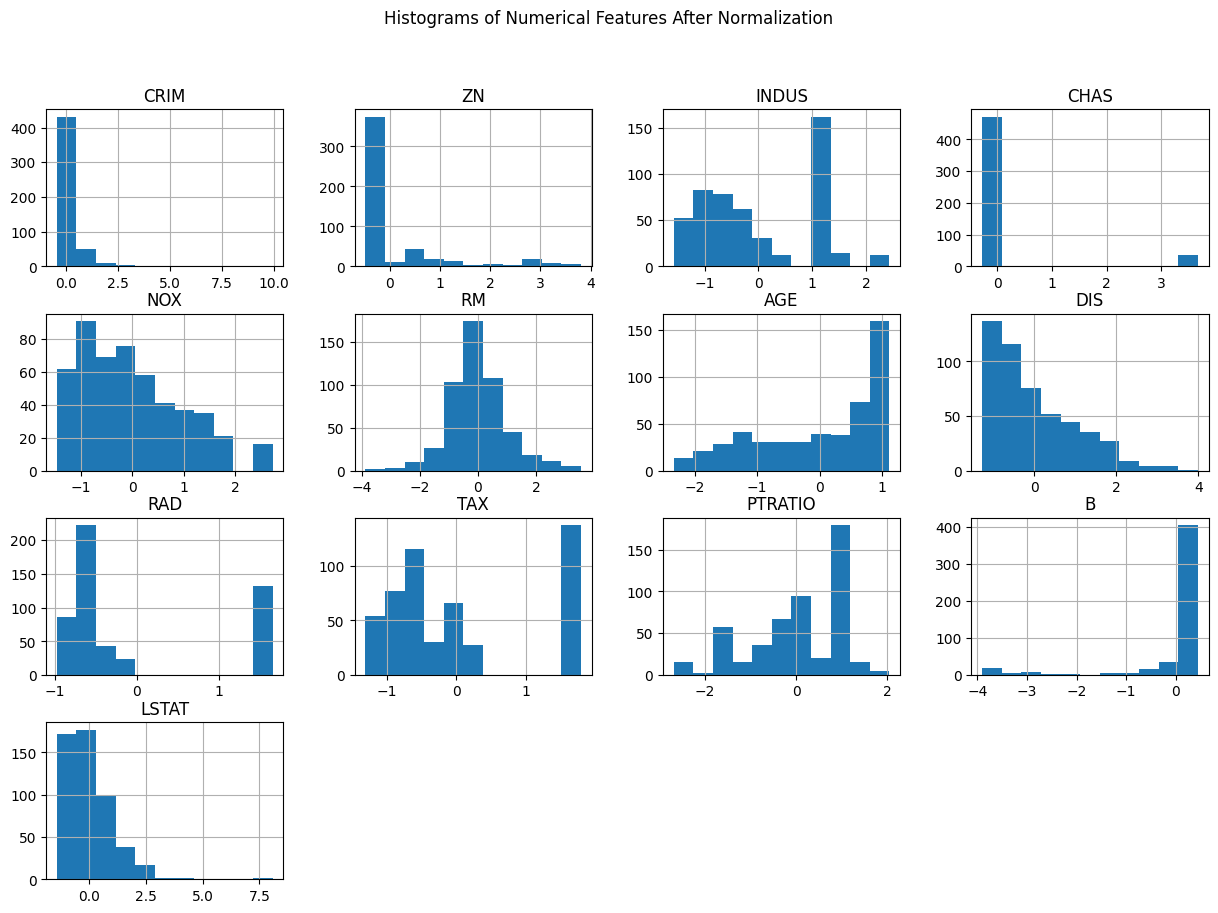


mean after standardization: 
 CRIM      -5.616939e-17
ZN        -2.808469e-17
INDUS     -2.808469e-17
CHAS      -3.510587e-17
NOX        2.527622e-16
RM        -5.265880e-17
AGE        8.425408e-17
DIS        0.000000e+00
RAD        0.000000e+00
TAX        5.616939e-17
PTRATIO   -1.319981e-15
B          1.123388e-16
LSTAT      0.000000e+00
dtype: float64, 
std after standardization:
 CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler

# A lot of the features have many outliers, as evidenced by the boxplots
# Therefore, it is essential to standardize the data to improve the model

#Initializing standard scalar, which will be used to standardize the features of the data
scalar = StandardScaler()

# Initialzing a dataframe excluding the target variable (Median Value)
data_features = data.drop(columns=['MEDV'])

# Storing the names for all the features
features = data_features.columns.tolist()

#Transform all the features in the data using the Z-score method
data_normalized = pd.DataFrame(data, columns=features)
data_normalized = pd.DataFrame(scalar.fit_transform(data[features]))
data_normalized.columns = features


#Visualizng results using histograms
mean = np.mean(data_normalized)
data_normalized.hist(bins=11, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features After Normalization')
plt.show()

#To verify that mean is 0 and standard deviation is 1
print("\nmean after standardization: \n {}, \nstd after standardization:\n {}".format(data_normalized[features].mean() , data_normalized[features].std()))


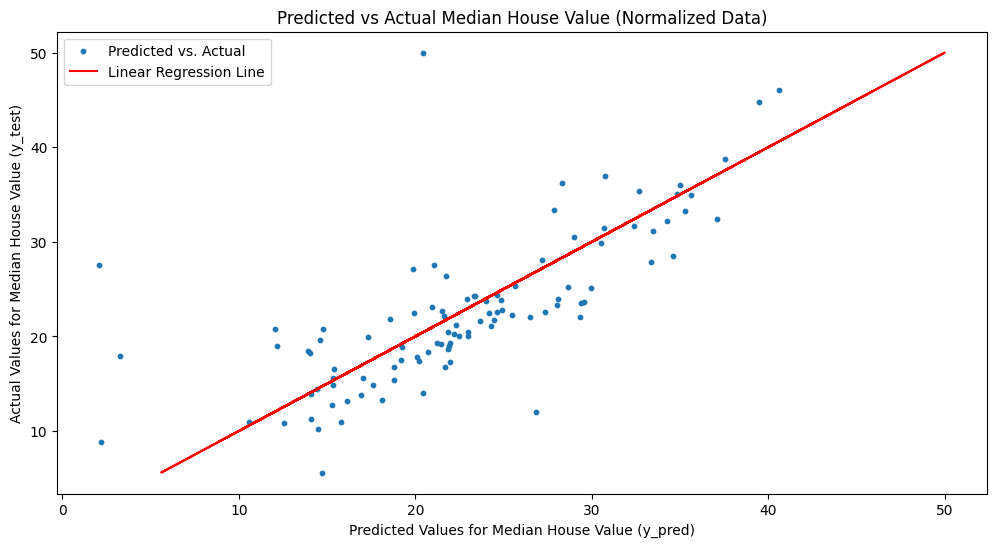

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#Initalizing input and target data using the standardized dataset
X = data_normalized
y = data['MEDV']

# Splitting dataset and running linear regression after normalizing features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values with normalized testing set
y_pred = model.predict(X_test)

#visualizing results with a plot with normalized data
plt.figure(figsize=(12, 6))
plt.scatter(x = y_pred, y = y_test, s = 10, label='Predicted vs. Actual')
plt.plot(y_test, y_test, color ='red', label = 'Linear Regression Line')
plt.ylabel('Actual Values for Median House Value (y_test)')
plt.xlabel('Predicted Values for Median House Value (y_pred)')
plt.title('Predicted vs Actual Median House Value (Normalized Data)')
plt.legend()
plt.show()



In [7]:
print(len(y))

506
